# Lasso Model

In this notebook, a "Lasso" model was created, and GridSearchCV was used to tune alpha "Hyperparameter"

In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

Different brands and models were concatenated to one dataframe

In [2]:
# Read and concatenate all CSV's

path = r'D:\Data_Analytics\Project 3\Data'
all_files = glob.glob(path + "/*.csv")

li = []
brands = ["Audi","BMW","Ford","Hyundi","Mercedes Benz","Skoda","Toyota","Volkswagen"]

for filename, brand in zip(all_files, brands):
    df = pd.read_csv(filename, index_col=None, header=0)
    df["make"] = brand
    li.append(df)
    
frame = pd.concat(li, axis=0, ignore_index=True)
frame


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
85550,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6,Volkswagen
85551,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7,Volkswagen
85552,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0,Volkswagen
85553,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6,Volkswagen


In [3]:
# Convert year to string
frame['year'] = frame['year'].astype(str)

In [4]:
#verify null values
frame.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
make            0
dtype: int64

In [5]:
# check columns type
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85555 entries, 0 to 85554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         85555 non-null  object 
 1   year          85555 non-null  object 
 2   price         85555 non-null  int64  
 3   transmission  85555 non-null  object 
 4   mileage       85555 non-null  int64  
 5   fuelType      85555 non-null  object 
 6   tax           85555 non-null  int64  
 7   mpg           85555 non-null  float64
 8   engineSize    85555 non-null  float64
 9   make          85555 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 6.5+ MB


In [6]:
# Use Pandas get_dummies to convert categorical data

cars_one_hot = pd.get_dummies(frame, columns =['model','year', 'transmission', 'fuelType', 'make'])
cars_one_hot.head()


,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,...,fuelType_Other,fuelType_Petrol,make_Audi,make_BMW,make_Ford,make_Hyundi,make_Mercedes Benz,make_Skoda,make_Toyota,make_Volkswagen
0,12500,15735,150,55.4,1.4,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,16500,36203,20,64.2,2.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,11000,29946,30,55.4,1.4,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,16800,25952,145,67.3,2.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,17300,1998,145,49.6,1.0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [7]:
# Assign X (data) and y (target)

X = cars_one_hot.drop(['price'],axis=1)
y = cars_one_hot["price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(85555, 221) (85555, 1)


In [8]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [9]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train[["mileage","tax","mpg","engineSize"]])
y_scaler = StandardScaler().fit(y_train)


In [10]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train[["mileage","tax","mpg","engineSize"]])
X_test_scaled = X_scaler.transform(X_test[["mileage","tax","mpg","engineSize"]])
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [11]:
# LASSO model
model = Lasso()

In [12]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust

param_grid = {'alpha': [0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06,0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
grid = GridSearchCV(model, param_grid, scoring = 'r2', verbose=3)

In [13]:
# Fit the model using the grid search estimator. 
# This will take the lasso model and try each combination of parameters
grid.fit(X_train_scaled, y_train_scaled)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] alpha=0.001 .....................................................
[CV] ......................... alpha=0.001, score=0.658, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ......................... alpha=0.001, score=0.659, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ......................... alpha=0.001, score=0.654, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ......................... alpha=0.001, score=0.662, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ......................... alpha=0.001, score=0.668, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] .......................... alpha=0.01, score=0.657, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=0.02 ......................................................
[CV] .......................... alpha=0.02, score=0.666, total=   0.0s
[CV] alpha=0.03 ......................................................
[CV] .......................... alpha=0.03, score=0.655, total=   0.0s
[CV] alpha=0.03 ......................................................
[CV] .......................... alpha=0.03, score=0.657, total=   0.0s
[CV] alpha=0.03 ......................................................
[CV] .......................... alpha=0.03, score=0.654, total=   0.0s
[CV] alpha=0.03 ......................................................
[CV] .......................... alpha=0.03, score=0.659, total=   0.0s
[CV] alpha=0.03 ......................................................
[CV] .......................... alpha=0.03, score=0.665, total=   0.0s
[CV] alpha=0.04 ......................................................
[CV] .......................... alpha=0.04, score=0.653, total=   0.0s
[CV] a

[CV] ........................... alpha=10, score=-0.000, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ........................... alpha=10, score=-0.000, total=   0.0s
[CV] alpha=20 ........................................................
[CV] ........................... alpha=20, score=-0.000, total=   0.0s
[CV] alpha=20 ........................................................
[CV] ........................... alpha=20, score=-0.000, total=   0.0s
[CV] alpha=20 ........................................................
[CV] ........................... alpha=20, score=-0.000, total=   0.0s
[CV] alpha=20 ........................................................
[CV] ........................... alpha=20, score=-0.000, total=   0.0s
[CV] alpha=20 ........................................................
[CV] ........................... alpha=20, score=-0.000, total=   0.0s
[CV] alpha=50 ........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                   0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=3)

In [14]:
# List the best parameters for this dataset
print(grid.best_params_)

{'alpha': 0.001}


In [15]:
print('Test Acc: %.3f' % grid.score(X_test_scaled, y_test_scaled))

Test Acc: 0.653


In [16]:
print('Test Acc: %.3f' % grid.best_score_)

Test Acc: 0.660


Examining Lasso Model with aplha = 0.001

In [17]:
# Lasso with best param
lasso_model= Lasso(alpha=0.001)
# Extract the coefficient for all features
lasso_coeffs = lasso_model.fit(X_train_scaled,y_train_scaled).coef_
feature_names = ["mileage","tax","mpg","engineSize"]

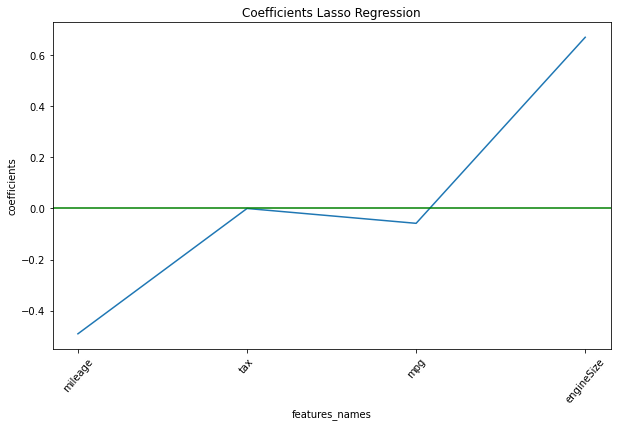

In [18]:
# plot coefficient estimates
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),lasso_coeffs)
plt.axhline(0, color='g', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficients Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features_names")
plt.show()